In [1]:
import sys
sys.path.append('../')

import numpy as np
import core

%load_ext autoreload
%autoreload 2

from core.pwe import PlaneWaveExp
import matplotlib.pyplot as plt

## Reproduce Fig. 2 in Chapter 5 of "Photonic Crystals: Molding the Flow of Light"

In [8]:
core.set_backend('autograd') # Use this to try the autograd backend

In [9]:
# Initialize a lattice
lattice = core.Lattice('square')
# Initialize a layer
layer = core.Layer(lattice, eps_b = 1)
# Add a shape to this layer 
layer.add_shape('circle', {'x': 0, 'y': 0, 'r': 0.2, 'eps': 8.9})

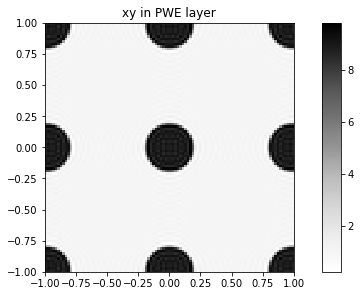

In [15]:
pwe = PlaneWaveExp(layer, gmax=10)
pwe.plot_overview_ft()

### New method added to initialize paths in the BZ!

In [16]:
path = layer.lattice.bz_path(['G', 'X', 'M', 'G'], [20])

In [17]:
# Now we can run the PWE for both polarizations
pwe.run(kpoints=path.kpoints, pol='te')
freqs_te = pwe.freqs
pwe.run(kpoints=path.kpoints, pol='tm')
freqs_tm = pwe.freqs

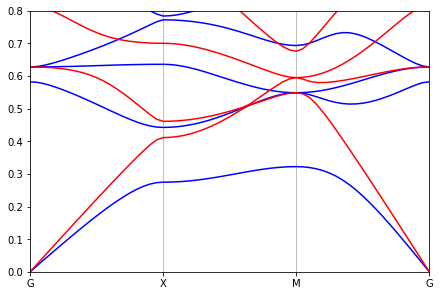

In [18]:
# And plot the results!
fig, ax = plt.subplots(1, constrained_layout=True)
plt.plot(freqs_tm, 'b')
plt.plot(freqs_te, 'r')
ax.set_ylim([0, 0.8])
ax.set_xlim([0, pwe.freqs.shape[0]-1])
plt.xticks(path.pt_inds, path.pt_labels)
ax.xaxis.grid('True')
plt.show()

## Reproduce Fig. 10 in Chapter 5 of "Photonic Crystals: Molding the Flow of Light"

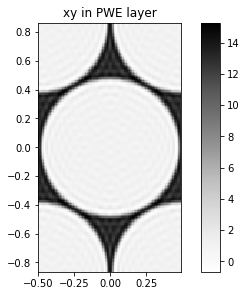

In [10]:
# Initialize a lattice
lattice = core.Lattice('hexagonal')
# Initialize a layer
layer = core.Layer(lattice, eps_b = 13)
# Add a shape to this layer 
layer.add_shape('circle', {'x': 0, 'y': 0, 'r': 0.48, 'eps': 1})

# Initialize the PWE 
pwe = PlaneWaveExp(layer, gmax=10)
pwe.plot_overview_ft()

### The bz_path() method also allows for custom number of points between different points

In [12]:
path = layer.lattice.bz_path(['G', 'M', 'K', 'G'], [20, 10, 20])

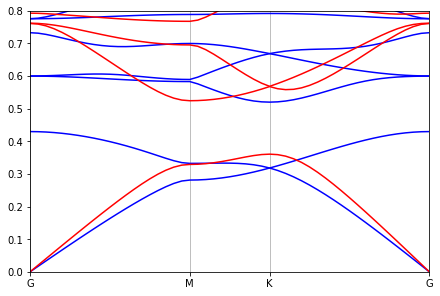

In [13]:
# Now we can run the PWE for both polarizations
pwe.run(kpoints=path.kpoints, pol='te')
freqs_te = pwe.freqs
pwe.run(kpoints=path.kpoints, pol='tm')
freqs_tm = pwe.freqs

# And plot the results!
fig, ax = plt.subplots(1, constrained_layout=True)
plt.plot(freqs_tm, 'b')
plt.plot(freqs_te, 'r')
ax.set_ylim([0, 0.8])
ax.set_xlim([0, pwe.freqs.shape[0]-1])
plt.xticks(path.pt_inds, path.pt_labels)
ax.xaxis.grid('True')
plt.show()